In [1]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Path to results folder
results_folder = ""

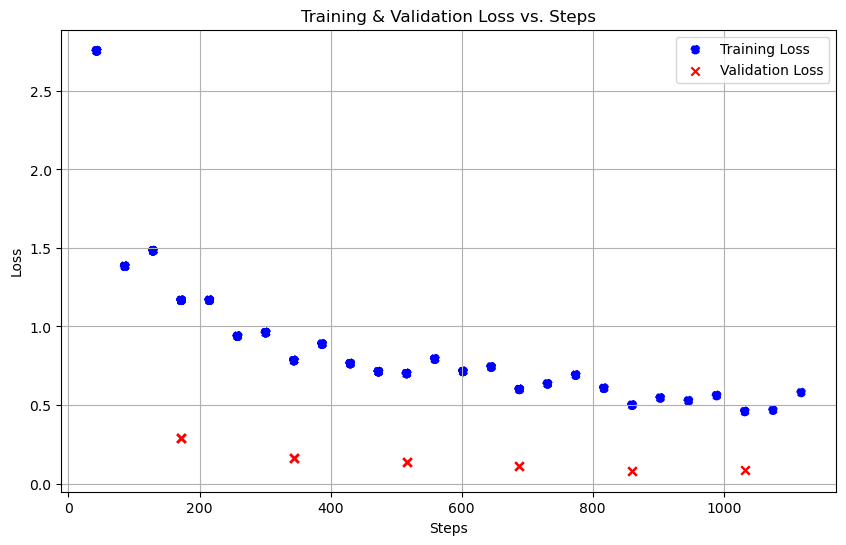

In [3]:
# Find all `trainer_state.json` files in checkpoint folders
trainer_state_files = []
for root, dirs, files in os.walk(results_folder):
    for file in files:
        if file == "trainer_state.json":
            trainer_state_files.append(os.path.join(root, file))

if not trainer_state_files:
    raise FileNotFoundError("No `trainer_state.json` files found in the results folder.")

steps = []
epochs = []
train_losses = []

val_steps = []
val_losses = []

# Parse each `trainer_state.json` file
for file in trainer_state_files:
    with open(file, "r") as f:
        trainer_state = json.load(f)
        log_history = trainer_state.get("log_history", [])

        for entry in log_history:
            step = entry.get("step")
            epoch = entry.get("epoch")
            train_loss = entry.get("loss")        # training loss
            eval_loss = entry.get("eval_loss")    # validation loss if present

            # Training loss
            if step is not None and train_loss is not None:
                steps.append(step)
                train_losses.append(train_loss)
                if epoch is not None:
                    epochs.append(epoch)

            # Validation loss
            if step is not None and eval_loss is not None:
                val_steps.append(step)
                val_losses.append(eval_loss)

# Plot Training vs. Validation Loss
plt.figure(figsize=(10, 6))

# Plot training loss
plt.scatter(steps, train_losses, label="Training Loss", color="blue", marker="o", linestyle="--")

# Plot validation loss (if it exists)
if val_losses:
    plt.scatter(val_steps, val_losses, label="Validation Loss", color="red", marker="x", linestyle="-")

plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training & Validation Loss vs. Steps")
plt.legend()
plt.grid(True)
plt.show()

